<a href="https://colab.research.google.com/github/tylerlum/Tray_Image_Classifier_A/blob/master/Copy_of_ReadData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install googledrivedownloader

In [3]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1smbsz8AJ-VGhKbtr7NTvAVzTI3auI_C4',
                                    dest_path='./tray-data/file.7z')

!ls /content/tray-data

In [4]:
# Extract.7z file
!7z x /content/tray-data/file.7z 


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/tray-data/                             1 file, 987230795 bytes (942 MiB)

Extracting archive: /content/tray-data/file.7z
--
Path = /content/tray-data/file.7z
Type = 7z
Physical Size = 987230795
Headers Size = 38637
Method = LZMA2:26
Solid = +
Blocks = 1

  0%      7% 437 - data_HiRes/multi/L06_L10/L06_L10_006.png                                                    14% 774 - data_HiRes/multi/L08_L09_L11/L08_L09_L11_143.png                                                           

In [0]:
!mv data_HiRes tray-data

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [9]:
# Setup for one hot encoding values
%cd /content/tray-data/data_HiRes/single
one_hot_encode = {}
types = [directory for directory in os.listdir('.')]
types.sort()
i = 0
for type in types:
  one_hot_encode[type] = i
  i = i + 1

/content/tray-data/data_HiRes/single


In [10]:
%cd /content/tray-data/data_HiRes/single
import os
full_dataset = {}
P = 0
for directory in os.listdir('.'):
  x_data = []
  y_data = []
  for png in os.listdir('/content/tray-data/data_HiRes/single/' + directory):
    im = cv2.imread('/content/tray-data/data_HiRes/single/' + directory + '/' + png)
    x_data.append(im)
    a = np.zeros((len(types), 1))
    a[one_hot_encode[directory]] = 1
    y_data.append(a)
  full_dataset[str(directory) + "_x"] = x_data
  full_dataset[str(directory) + "_y"] = y_data
  


/content/tray-data/data_HiRes/single


(325, 325, 3)


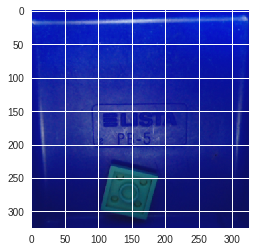

In [11]:
print(full_dataset['L11_x'][0].shape)
plt.imshow(full_dataset['L11_x'][10])

plt.imshow(b[1])

In [30]:
X_train = None
X_test = None
Y_train = None
Y_test = None
  
keys_x = [key for key in full_dataset if not key.find("_x") == -1]
keys_x.sort()

num_pictures = 10
for key_x in keys_x:
  i = 0
  for im in full_dataset[key_x]:
    if i <= num_pictures:
      if X_train is None:
        X_train = np.array([im])
        a = np.zeros((len(keys_x), 1))
        a[one_hot_encode[key_x[:-2]]] = 1
        Y_train = np.array([a])
      else:
        X_train = np.append(X_train, [im], axis=0)
        a = np.zeros((len(keys_x), 1))
        a[one_hot_encode[key_x[:-2]]] = 1
        Y_train = np.append(Y_train, [a], axis=0)
        print(X_train.shape)
    elif i <= num_pictures * 3 / 2:
      if X_test is None:
        X_test = np.array([im])
        a = np.zeros((len(keys_x), 1))
        a[one_hot_encode[key_x[:-2]]] = 1
        Y_test = np.array([a])
      else:
        X_test = np.append(X_test, [im], axis=0)
        a = np.zeros((len(keys_x), 1))
        a[one_hot_encode[key_x[:-2]]] = 1
        Y_test = np.append(Y_test, [a], axis=0)
        print(X_test.shape)
    else:
      break
    i = i + 1
Y_train = Y_train[:, :, 0].T
Y_test = Y_test[:, :, 0].T
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(2, 325, 325, 3)
(3, 325, 325, 3)
(4, 325, 325, 3)
(5, 325, 325, 3)
(6, 325, 325, 3)
(7, 325, 325, 3)
(8, 325, 325, 3)
(9, 325, 325, 3)
(10, 325, 325, 3)
(11, 325, 325, 3)
(2, 325, 325, 3)
(3, 325, 325, 3)
(4, 325, 325, 3)
(5, 325, 325, 3)
(12, 325, 325, 3)
(13, 325, 325, 3)
(14, 325, 325, 3)
(15, 325, 325, 3)
(16, 325, 325, 3)
(17, 325, 325, 3)
(18, 325, 325, 3)
(19, 325, 325, 3)
(20, 325, 325, 3)
(21, 325, 325, 3)
(22, 325, 325, 3)
(6, 325, 325, 3)
(7, 325, 325, 3)
(8, 325, 325, 3)
(9, 325, 325, 3)
(10, 325, 325, 3)
(23, 325, 325, 3)
(24, 325, 325, 3)
(25, 325, 325, 3)
(26, 325, 325, 3)
(27, 325, 325, 3)
(28, 325, 325, 3)
(29, 325, 325, 3)
(30, 325, 325, 3)
(31, 325, 325, 3)
(32, 325, 325, 3)
(33, 325, 325, 3)
(11, 325, 325, 3)
(12, 325, 325, 3)
(13, 325, 325, 3)
(14, 325, 325, 3)
(15, 325, 325, 3)
(34, 325, 325, 3)
(35, 325, 325, 3)
(36, 325, 325, 3)
(37, 325, 325, 3)
(38, 325, 325, 3)
(39, 325, 325, 3)
(40, 325, 325, 3)
(41, 325, 325, 3)
(42, 325, 325, 3)
(43, 325, 325, 3)
(44, 325

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


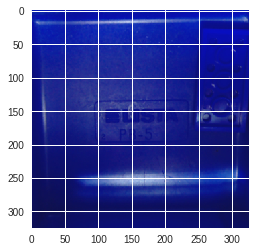

In [31]:
index = 180
plt.imshow(X_train[index])
print(Y_train[:, index])

In [32]:
import random
import copy

## Mix up data
num_switches = 100
for i in range(0, num_switches):
  rand1 = random.randint(0, X_train.shape[0]-1)
  rand2 = random.randint(0, X_train.shape[0]-1)
  temp = copy.copy(X_train[rand1])
  X_train[rand1] = X_train[rand2]
  X_train[rand2] = temp
  
  temp = copy.copy(Y_train[:, rand1])
  Y_train[:, rand1] = Y_train[:, rand2]
  Y_train[:, rand2] = temp
  
  print(str(rand1) + " " + str(rand2))
  
for i in range(0, num_switches):
  rand1 = random.randint(0, X_test.shape[0]-1)
  rand2 = random.randint(0, X_test.shape[0]-1)
  temp = copy.copy(X_test[rand1])
  X_test[rand1] = X_test[rand2]
  X_test[rand2] = temp
  
  temp = copy.copy(Y_test[:, rand1])
  Y_test[:, rand1] = Y_test[:, rand2]
  Y_test[:, rand2] = temp
  
  print(str(rand1) + " " + str(rand2))

17 108
226 193
156 250
214 0
27 32
186 224
220 46
176 188
90 136
64 90
93 129
171 99
16 235
215 164
30 132
211 227
232 24
94 158
177 0
158 66
15 49
91 60
110 121
125 73
228 137
150 156
23 5
123 98
26 83
46 246
31 148
32 90
223 169
190 125
236 28
89 128
246 108
94 174
105 5
162 42
90 108
1 31
40 68
88 239
47 199
63 108
114 49
143 100
23 89
48 16
135 134
178 46
46 123
215 117
177 122
41 131
184 143
180 102
75 71
59 170
23 107
10 226
198 8
220 25
165 103
50 249
92 247
121 32
197 128
151 61
32 58
213 56
121 211
160 3
242 5
153 77
140 213
94 107
67 158
201 125
242 217
231 220
158 227
107 23
15 229
65 0
169 210
24 160
26 112
0 89
12 237
34 126
108 81
220 109
76 115
171 129
195 222
137 147
72 173
14 240
53 64
57 26
94 25
108 10
31 44
8 26
31 42
48 10
34 96
58 59
93 74
19 86
47 39
16 53
26 38
25 53
11 47
15 100
77 114
89 19
18 24
24 74
9 62
12 26
25 42
109 58
90 113
40 36
41 70
78 114
105 94
57 65
20 1
100 50
12 77
43 25
11 61
16 77
49 37
66 77
79 40
62 32
112 78
26 3
63 39
4 53
82 90
58 2
56 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


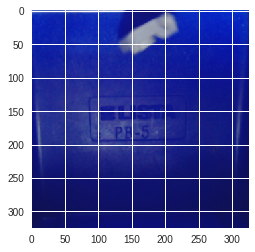

In [33]:
index = 12
plt.imshow(X_test[index])
print(Y_test[:, index])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


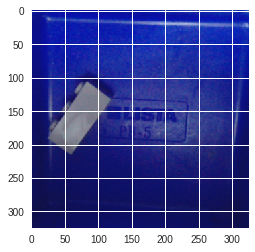

In [35]:
index = 190
plt.imshow(X_train[index])
print(Y_train[:, index])

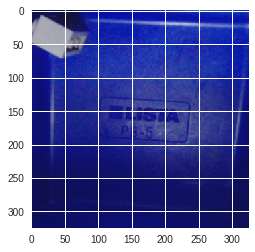

In [36]:
plt.imshow(full_dataset['L07_x'][0])

In [27]:
print(X_train.shape)
print(Y_train.shape)

(253, 325, 325, 3)
(23, 253)


In [37]:
# Reshape the training and test examples 
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = X_train_flatten/255.
test_x = X_test_flatten/255.

train_y = Y_train
test_y = Y_test
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train_y's shape: " + str(train_y.shape))
print ("test_y's shape: " + str(test_y.shape))

train_x's shape: (316875, 253)
test_x's shape: (316875, 115)
train_y's shape: (23, 253)
test_y's shape: (23, 115)


In [0]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(dtype=tf.float32, shape=[n_x, None])
    Y = tf.placeholder(dtype=tf.float32, shape=[n_y, None])
    ### END CODE HERE ###
    
    return X, Y

In [0]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 316875]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [23, 12]
                        b3 : [23, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [45, 316875], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [45, 1], initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [40, 45], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [40, 1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [35, 40], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [35, 1], initializer=tf.zeros_initializer())
    W4 = tf.get_variable("W4", [30, 35], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b4 = tf.get_variable("b4", [30, 1], initializer=tf.zeros_initializer())
    W5 = tf.get_variable("W5", [23, 30], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b5 = tf.get_variable("b5", [23, 1], initializer=tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,
                  "W5": W5,
                  "b5": b5}
    
    return parameters

In [0]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                                              # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                                              # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)
    A3 = tf.nn.relu(Z3)                                              # A2 = relu(Z2)
    Z4 = tf.add(tf.matmul(W4, A3), b4)
    A4 = tf.nn.relu(Z4)                                              # A2 = relu(Z2)
    Z5 = tf.add(tf.matmul(W5, A4), b5)

    ### END CODE HERE ###
    
    return Z5

In [0]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z5, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z5)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    print(Z5.shape)
    print(Y.shape)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    ### END CODE HERE ###
    
    return cost

In [0]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.00001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    

    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

(23, ?)
(23, ?)
Cost after epoch 0: 2.248463
Cost after epoch 100: 1.950701
Cost after epoch 200: 1.735297
Cost after epoch 300: 1.464863
Cost after epoch 400: 1.248711
Cost after epoch 500: 1.108282
Cost after epoch 600: 0.847604
Cost after epoch 700: 0.731090
Cost after epoch 800: 0.556986
Cost after epoch 900: 0.459623
Cost after epoch 1000: 0.334987
Cost after epoch 1100: 0.286759
Cost after epoch 1200: 0.228928
Cost after epoch 1300: 0.183685
Cost after epoch 1400: 0.160950


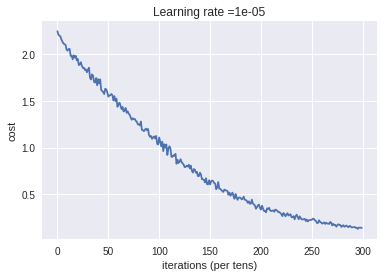

Parameters have been trained!
Train Accuracy: 0.99604744
Test Accuracy: 0.59130436


In [97]:
parameters = model(train_x, train_y, test_x, test_y)

In [53]:
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train_y's shape: " + str(train_y.shape))
print ("test_y's shape: " + str(test_y.shape))

train_x's shape: (316875, 253)
test_x's shape: (316875, 115)
train_y's shape: (23, 253)
test_y's shape: (23, 115)


In [0]:
def random_mini_batches(X_train, Y_train, minibatch_size, seed):
  random.seed(seed)
  retVal = []
  (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
  (n_y, m) = Y_train.shape 
  num_minibatches = m // minibatch_size - 2
  visited = []
  
  for minibatch in range(0, num_minibatches):
    x = np.zeros((n_x, minibatch_size))
    y = np.zeros((n_y, minibatch_size))
    for i in range(0, minibatch_size):
      index = -1
      while index < 0:
        index = random.randint(0, X_train.shape[1] - 1)
        if index in visited:
          index = -1
      visited.append(index)
      x[:, i] = X_train[:, index]
      y[:, i] = Y_train[:, index]
    retVal.append((x, y))
      
  return retVal

In [89]:
#print(random_mini_batches(train_x, train_y, 10, 1)[0][0].shape)
print(Y_train[:, 10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


y = 0, you predicted that it is 0.0


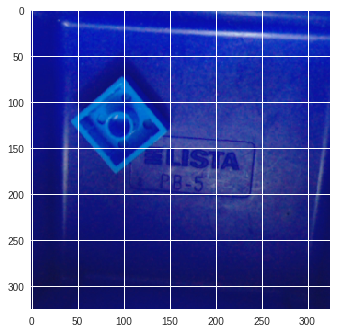

In [0]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_y[0,index]) + ", you predicted that it is " + str(d["Y_prediction_test"][0,index]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


y = 1.0


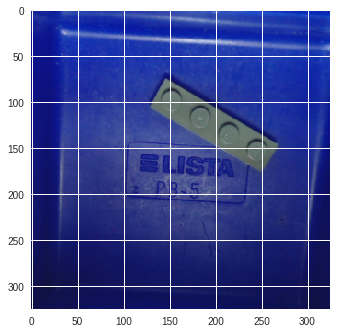

In [0]:
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "thumbs_up.jpg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))